In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,NaN,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,NaN,0.77291,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.43280,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.61825,3.265800
4,0.098830,0.23418,NaN,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.02690,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.23110,0.005387
796,3.466600,-4.03460,3.100400,NaN,1.377300,2.28870,0.39613,2.39610,NaN,1.66750,2.46170,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.62250,NaN
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.88450,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	26
float64		column 2	39
float64		column 3	39
float64		column 4	79
float64		column 5	52
float64		column 6	39
float64		column 7	0
float64		column 8	53
float64		column 9	14
float64		column 10	78
float64		column 11	39
float64		column 12	13


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,774.000000,761.000000,761.000000,721.000000,748.000000,761.000000,800.000000,747.000000,786.000000,722.000000,761.000000,787.000000
mean,1.474256,1.282775,1.977356,1.932728,1.990653,2.013289,1.957646,2.011802,1.997666,1.997437,1.946254,1.966993
std,2.728144,3.610766,1.125389,1.144454,1.154968,1.129137,1.168619,1.119444,1.139170,1.134767,1.161916,1.123510
min,-4.692600,-6.341500,0.020547,0.002628,0.021103,0.002230,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.441705,-0.621290,1.030700,0.975400,1.002300,1.058800,0.949470,1.020950,1.067325,1.064075,0.916070,1.006700
50%,0.721610,1.095500,1.965900,1.899600,2.019150,2.012800,1.960500,2.007400,1.988450,2.019300,1.913900,1.956600
75%,3.961325,4.505100,2.894300,2.924500,2.950775,3.005300,2.984625,2.904800,3.002575,2.965225,2.964600,2.875400
max,6.982200,8.018800,3.992600,3.997300,3.988600,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

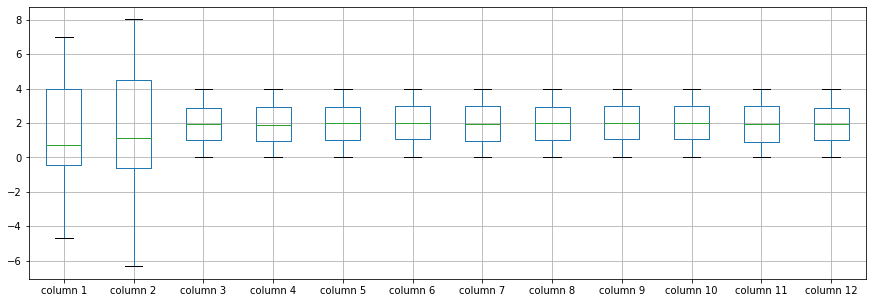

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.474256
column 2     1.282775
column 3     1.977356
column 4     1.932728
column 5     1.990653
column 6     2.013289
column 7     1.957646
column 8     2.011802
column 9     1.997666
column 10    1.997437
column 11    1.946254
column 12    1.966993
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.437111,0.000197,0.031355,0.051119,0.050311,-0.014721,0.014801,-0.020572,0.009563,0.049150,0.029792
column 2,-0.437111,1.000000,0.022030,-0.035129,-0.026550,0.006614,0.014319,-0.009294,0.006150,-0.049507,-0.090063,0.046843
column 3,0.000197,0.022030,1.000000,-0.036042,0.060981,0.002042,0.021814,-0.012332,-0.008415,0.009758,-0.051246,0.002347
column 4,0.031355,-0.035129,-0.036042,1.000000,-0.006597,-0.020921,0.038541,0.062741,-0.003227,0.035855,0.054525,-0.005539
column 5,0.051119,-0.026550,0.060981,-0.006597,1.000000,0.056244,0.004814,-0.005626,-0.017730,-0.037311,-0.016215,0.009842
column 6,0.050311,0.006614,0.002042,-0.020921,0.056244,1.000000,-0.070692,0.059972,0.002151,-0.011100,-0.021871,-0.013212
column 7,-0.014721,0.014319,0.021814,0.038541,0.004814,-0.070692,1.000000,-0.029692,-0.009832,-0.058836,-0.010661,-0.008340
column 8,0.014801,-0.009294,-0.012332,0.062741,-0.005626,0.059972,-0.029692,1.000000,-0.036453,-0.049638,0.005813,-0.045647
column 9,-0.020572,0.006150,-0.008415,-0.003227,-0.017730,0.002151,-0.009832,-0.036453,1.000000,0.052799,-0.032098,-0.009635
column 10,0.009563,-0.049507,0.009758,0.035855,-0.037311,-0.011100,-0.058836,-0.049638,0.052799,1.000000,-0.073394,0.045255


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+20,12+20+20,12+20+20+20,12+20+20+20+20,12+20+20+20+20+20,12+20+20+20+20+20+20,12+20+20+20+20+20+20+20,12+20+20+20+20+20+20,12+20+20+20+20+20,12+20+20+20+20,12+20+20+20,12+20+20,12+20,12], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.08604290008545
Epoch: 1 , loss: 27.88280960083008
Epoch: 2 , loss: 27.331982879638673
Epoch: 3 , loss: 24.416529808044434
Epoch: 4 , loss: 23.299934539794922
Epoch: 5 , loss: 22.720783042907716
Epoch: 6 , loss: 22.111645317077638
Epoch: 7 , loss: 21.865637245178224
Epoch: 8 , loss: 21.468454780578615
Epoch: 9 , loss: 21.060989265441894
Epoch: 10 , loss: 21.000487022399902
Epoch: 11 , loss: 20.738876953125
Epoch: 12 , loss: 20.54692451477051
Epoch: 13 , loss: 20.078063774108887
Epoch: 14 , loss: 20.120030937194823
Epoch: 15 , loss: 19.817024917602538
Epoch: 16 , loss: 19.69979190826416
Epoch: 17 , loss: 19.46094295501709
Epoch: 18 , loss: 19.505357666015627
Epoch: 19 , loss: 19.558269233703612
Epoch: 20 , loss: 19.626605567932128
Epoch: 21 , loss: 19.548535499572754
Epoch: 22 , loss: 19.62079601287842
Epoch: 23 , loss: 19.256235389709474
Epoch: 24 , loss: 19.37823143005371
Epoch: 25 , loss: 19.282844

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,-2.888391,0.000000
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,-1.357747,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
4,0.0,0.0,0.413923,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000
796,0.0,0.0,0.000000,0.025148,0.0,0.000000,0.0,0.0,-1.01534,0.000000,0.000000,0.000000
797,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.850722
798,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(43.43742288329449, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.17499424482944814

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.533700,0.469590,0.679080,3.43440,2.79240,2.77630,1.699100,0.927209,1.746400
1,-0.098505,-0.17857,2.062800,2.921600,0.424720,1.178500,1.68020,1.38880,3.21670,1.565853,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.065000,1.567600,1.482400,0.92160,2.64240,1.51870,2.531800,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.956300,2.787000,2.595700,2.89330,1.53750,0.99942,3.659300,0.618250,3.265800
4,0.098830,0.23418,0.843623,1.631200,3.554100,2.271100,0.37425,2.17860,1.31400,1.063200,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.556120,0.070769,2.074700,0.80304,3.22290,3.49330,1.325500,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.371248,1.377300,2.288700,0.39613,2.39610,1.44816,1.667500,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.264600,3.341200,1.537000,1.22560,0.74027,2.49540,1.343300,1.622500,2.436022
798,3.441400,-5.21630,1.577000,1.844000,1.098700,3.424300,0.81081,3.72700,1.18790,0.951120,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NN_5(imp).xlsx", index=False, header=False)